# Load Data

In [167]:
# demoからmetadataとtableをロードする
from sdv import load_demo

metadata, tables = load_demo(metadata=True)

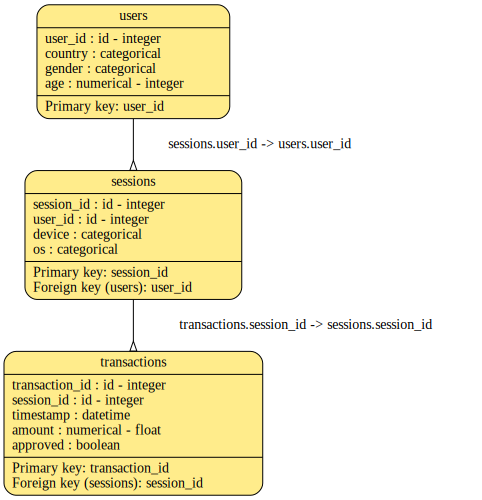

In [163]:
metadata.visualize()

In [164]:
tables['users']

,user_id,country,gender,age
0,0,US,M,34
1,1,UK,F,23
2,2,ES,None,44
3,3,UK,M,22
4,4,US,F,54
5,5,DE,M,57
6,6,BG,F,45
7,7,ES,None,41
8,8,FR,F,23
9,9,UK,None,30


In [165]:
tables['sessions']

,session_id,user_id,device,os
0,0,0,mobile,android
1,1,1,tablet,ios
2,2,1,tablet,android
3,3,2,mobile,android
4,4,4,mobile,ios
5,5,5,mobile,android
6,6,6,mobile,ios
7,7,6,tablet,ios
8,8,6,mobile,ios
9,9,8,tablet,ios


In [166]:
tables['transactions']

,transaction_id,session_id,timestamp,amount,approved
0,0,0,2019-01-01 12:34:32,100.0,True
1,1,0,2019-01-01 12:42:21,55.3,True
2,2,1,2019-01-07 17:23:11,79.5,True
3,3,3,2019-01-10 11:08:57,112.1,False
4,4,5,2019-01-10 21:54:08,110.0,False
5,5,5,2019-01-11 11:21:20,76.3,True
6,6,7,2019-01-22 14:44:10,89.5,True
7,7,8,2019-01-23 10:14:09,132.1,False
8,8,9,2019-01-27 16:09:17,68.0,True
9,9,9,2019-01-29 12:10:48,99.9,True


In [126]:
# metadataとtableでテーブル間の関係を学習させる
from sdv import SDV

sdv = SDV()
sdv.fit(metadata, tables)

In [127]:
# 100件サンプリングする
sampled = sdv.sample(num_rows=100)

In [168]:
sampled['users'].head()

,user_id,country,gender,age
0,0,ES,F,40
1,1,DE,F,43
2,2,BG,F,37
3,3,FR,M,34
4,4,UK,NaN,42


In [169]:
sampled['sessions'].head()

,session_id,user_id,device,os
0,0,0,mobile,ios
1,1,0,mobile,ios
2,2,1,mobile,android
3,3,1,mobile,android
4,4,1,mobile,android


In [170]:
sampled['transactions'].head()

,transaction_id,session_id,timestamp,amount,approved
0,0,2,2019-01-16 23:46:20,105.804673,False
1,1,3,2019-01-16 23:45:35,105.771484,False
2,2,4,2019-01-16 23:46:03,105.792799,False
3,3,5,2019-01-13 21:42:00,89.692895,True
4,4,6,2019-01-13 21:42:00,89.692050,True


In [142]:
# 生成したデータセット
tmp_sample = pd.merge(sampled['transactions'], sampled['sessions'], on='session_id')
tmp_sample = pd.merge(tmp_sample, sampled['users'], on='user_id')
# オリジナルのデータセット
tmp_origin = pd.merge(tables['transactions'], tables['sessions'], on='session_id')
tmp_origin = pd.merge(tmp_origin, tables['users'], on='user_id')

Text(0.5, 1.0, 'mean amount by country[original dataset]')

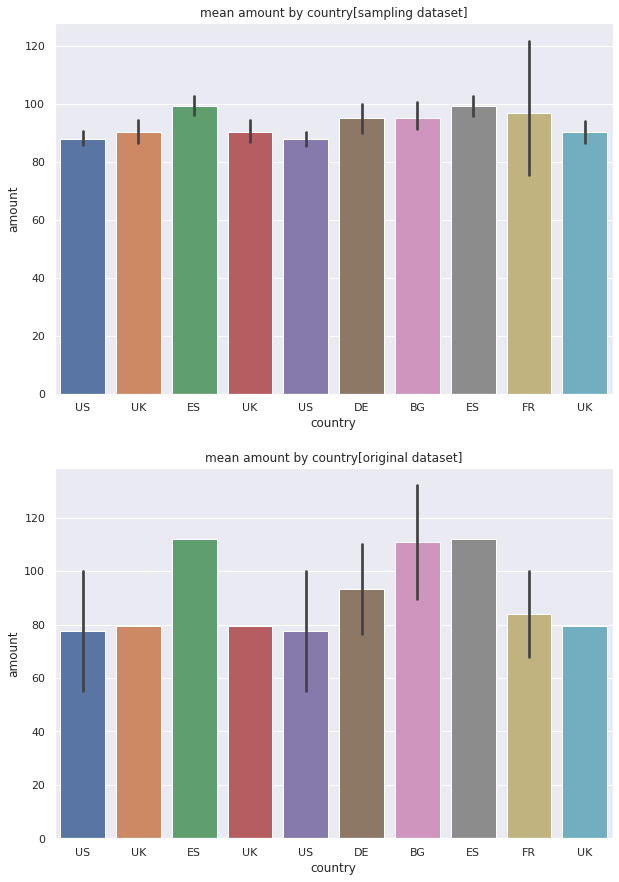

In [178]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

fig = plt.figure(figsize=(10,15))
ax1 = fig.add_subplot(2,1,1)
sns.barplot(x='country', y='amount', data=tmp_sample, order=tables['users'].country.tolist(), ax=ax1)
ax1.set_title('mean amount by country[sampling dataset]')

ax2 = fig.add_subplot(2,1,2)
sns.barplot(x='country', y='amount', data=tmp_origin, order=tables['users'].country.tolist(), ax=ax2)
ax2.set_title('mean amount by country[original dataset]')

# pandas.DataFrameからMetadataを作成する

In [154]:
# demoのmetadataとtable
from sdv import load_demo

metadata, tables = load_demo(metadata=True)

In [156]:
# 自らmetadataを作成してみる
from sdv import Metadata

metadata_create = Metadata()

In [157]:
# metadataにtable定義を追加する
metadata_create.add_table(name='users', data=tables['users'])
metadata_create.add_table(name='sessions', data=tables['sessions'])
metadata_create.add_table(name='transactions', data=tables['transactions'])

In [158]:
# metadataに追加したtable定義にpkを設定する
metadata_create.set_primary_key(table='users', field='user_id')
metadata_create.set_primary_key(table='sessions', field='session_id')
metadata_create.set_primary_key(table='transactions', field='transaction_id')

In [159]:
# metadataに追加したtable定義にrelationを定義する
metadata_create.add_relationship(parent='users', child='sessions', foreign_key='user_id')
metadata_create.add_relationship(parent='sessions', child='transactions', foreign_key='session_id')

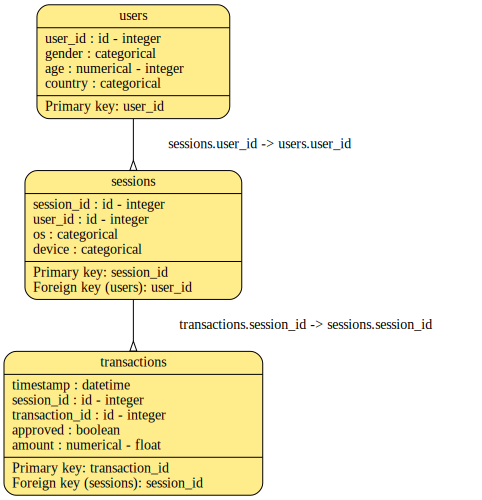

In [160]:
# 新たに作成したmetadataを可視化する
metadata_create.visualize()